### Import relevant libraries  

In [68]:
import pandas as pd

from sklearn import tree
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

### Preprocessing the data

#### Training dataset

In [69]:
train_data=pd.read_csv("Census_income_train.csv")

In [70]:
train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [71]:
len(train_data)

32560

In [72]:
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

#### removing rows with unknown values ('?')

In [73]:
clean_train_data=train_data[train_data["Workclass"].str.contains("\?")==False]

In [74]:
len(clean_train_data)

30724

In [75]:
clean_train_data=clean_train_data[clean_train_data["Occupation"].str.contains("\?")==False]

In [76]:
clean_train_data=clean_train_data[clean_train_data["Native-country"].str.contains("\?")==False]

In [77]:
len(clean_train_data)

30161

In [78]:
clean_train_data=clean_train_data.reset_index(drop=True)

usually random forests and decision trees can work with categorical data, but sklearn doesn't have this feature yet, so we have to create some dummy variables by onehot encoding the categorical variables.

### Creating dummy variables and separating inputs and targets

In [79]:
train_dummies=pd.get_dummies(clean_train_data,drop_first=False)

In [80]:
train_dummies.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [81]:
train_dummies=train_dummies.drop(['Income_ <=50K'],axis=1)

In [82]:
train_input=train_dummies.iloc[:,:-1]
train_target=train_dummies.iloc[:,-1]

### Test dataset preprocessing

In [83]:
test_data=pd.read_csv("Census_income_test.csv")

In [84]:
clean_test_data=test_data[test_data["Workclass"].str.contains("\?")==False]

In [85]:
clean_test_data=clean_test_data[clean_test_data["Occupation"].str.contains("\?")==False]

In [86]:
clean_test_data=clean_test_data[clean_test_data["Native-country"].str.contains("\?")==False]

In [87]:
clean_test_data=clean_test_data.reset_index(drop=True)

In [88]:
test_dummies=pd.get_dummies(clean_test_data,drop_first=False)

In [89]:
test_dummies=test_dummies.drop(['Income_ <=50K.'],axis=1)

In [90]:
test_input=test_dummies.iloc[:,:-1]
test_target=test_dummies.iloc[:,-1]

### Creating and visualising the tree

In [91]:
clf=tree.DecisionTreeClassifier(random_state=365,ccp_alpha=0.001)

In [92]:
clf.fit(train_input,train_target)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=365)

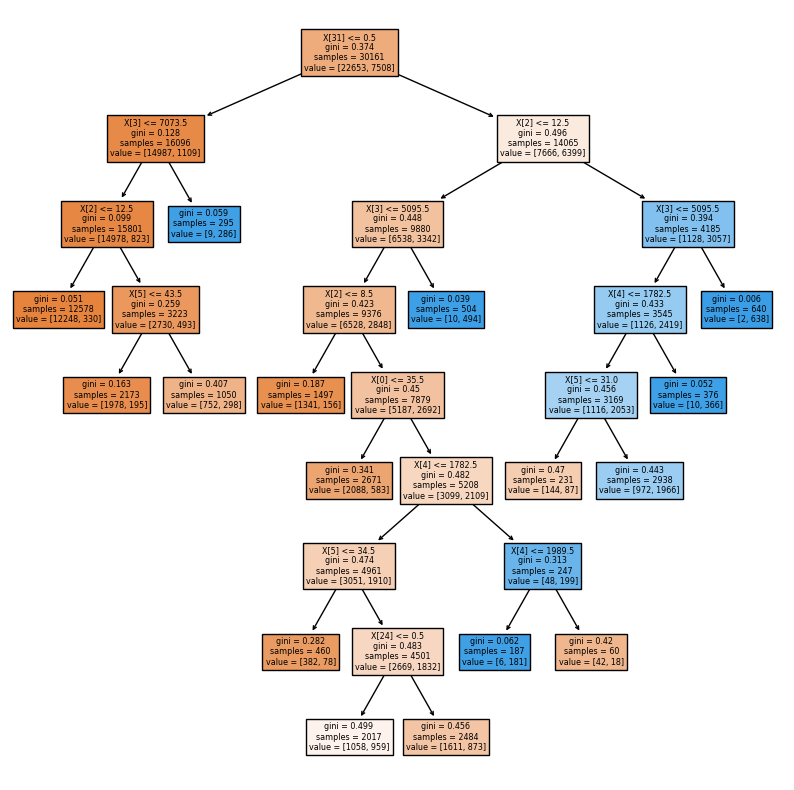

In [93]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True)
plt.show()

### Testing the model

In [94]:
test_pred=clf.predict(test_input)

In [95]:
print(classification_report(test_target,test_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90     11360
           1       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



### Creating and training the RF model

In [107]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(random_state=365,n_estimators=150,ccp_alpha=0.0001)
#n_estimators is the number of decision trees,100 by default

In [108]:
clf.fit(train_input,train_target)

RandomForestClassifier(ccp_alpha=0.0001, n_estimators=150, random_state=365)

### Testing the model

In [109]:
test_pred=clf.predict(test_input)

In [110]:
print(classification_report(test_target,test_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11360
           1       0.77      0.61      0.69      3700

    accuracy                           0.86     15060
   macro avg       0.83      0.78      0.80     15060
weighted avg       0.86      0.86      0.86     15060



this proves that random forest can be better only if the dataset allows it.